In [1]:
import ROOT 
import uproot
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.18/04


In [2]:
gen_jet_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['GenJet']
gen_jet_eta     = gen_jet_events['GenJet.Eta'].array()
gen_jet_phi     = gen_jet_events['GenJet.Phi'].array()
gen_jet_pt      = gen_jet_events['GenJet.PT'].array()
gen_jet_mass    = gen_jet_events['GenJet.Mass'].array()

In [2]:
jet_PUPPI_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['JetPUPPI']
jet_PUPPI_eta     = jet_PUPPI_events['JetPUPPI.Eta'].array()
jet_PUPPI_phi     = jet_PUPPI_events['JetPUPPI.Phi'].array()
jet_PUPPI_pt      = jet_PUPPI_events['JetPUPPI.PT'].array()
jet_PUPPI_btag    = jet_PUPPI_events['JetPUPPI.BTag'].array() 
jet_PUPPI_mass    = jet_PUPPI_events['JetPUPPI.Mass'].array() 
jet_PUPPI_charge  = jet_PUPPI_events['JetPUPPI.Charge'].array() 

In [4]:
electron_CHS_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['ElectronCHS']
electron_CHS_eta     = electron_CHS_events['ElectronCHS.Eta'].array()
electron_CHS_phi     = electron_CHS_events['ElectronCHS.Phi'].array()
electron_CHS_pt      = electron_CHS_events['ElectronCHS.PT'].array()
electron_CHS_charge  = electron_CHS_events['ElectronCHS.Charge'].array()

In [5]:
muon_CHS_events  = uproot.open('TTJets_DiLept_TuneCUETP8M1_14TeV-madgraphMLM-pythia8_200PU_1.root')['Delphes']['MuonTightCHS']
muon_CHS_eta     = muon_CHS_events['MuonTightCHS.Eta'].array()
muon_CHS_phi     = muon_CHS_events['MuonTightCHS.Phi'].array()
muon_CHS_pt      = muon_CHS_events['MuonTightCHS.PT'].array()
muon_CHS_charge  = muon_CHS_events['MuonTightCHS.Charge'].array()

In [3]:
tt_event_count    = uproot.open('emu_ttbarsignalplustau.root')['weightedEvents']
tt_events_gen     = uproot.open('emu_ttbarsignalplustau.root')['ttBar_treeVariables_step0']
tt_events_reco    = uproot.open('emu_ttbarsignalplustau.root')['ttBar_treeVariables_step8']

tt_l_pt           = tt_events_reco['l_pt'].array()
tt_l_eta          = tt_events_reco['l_eta'].array()
tt_l_phi          = tt_events_reco['l_phi'].array()

tt_lbar_pt        = tt_events_reco['lbar_pt'].array()
tt_lbar_eta       = tt_events_reco['lbar_eta'].array()
tt_lbar_phi       = tt_events_reco['lbar_phi'].array()

tt_b_pt           = tt_events_reco['b_pt'].array()
tt_b_eta          = tt_events_reco['b_eta'].array()
tt_b_phi          = tt_events_reco['b_phi'].array()

tt_bbar_pt        = tt_events_reco['bbar_pt'].array()
tt_bbar_eta       = tt_events_reco['bbar_eta'].array()
tt_bbar_phi       = tt_events_reco['bbar_phi'].array()


tt_llbar_dphi     = tt_events_reco['llbar_delta_phi'].array()
tt_llbar_dphi     = tt_events_reco['llbar_delta_phi'].array()

tt_bbbar_dphi     = tt_events_reco['bbbar_delta_phi'].array()
tt_gen_bbbar_dphi = tt_events_gen['gen_bbbar_delta_phi'].array()

tt_bbbar_deta     = tt_events_reco['bbbar_delta_eta'].array()
tt_gen_bbbar_deta = tt_events_gen['gen_bbbar_delta_eta'].array()

tt_event_weight   = tt_events_gen['eventWeight'].array()

In [35]:
jet_pt  = []
jet_phi = []
jet_eta = []

ajet_pt  = []
ajet_phi = []
ajet_eta = []

for i in range(len(jet_PUPPI_pt)) :
    if (len(jet_PUPPI_pt[i]) > 1) :
        if (jet_PUPPI_pt[i][1]  > 30 and jet_PUPPI_charge[i][0] == +1 and jet_PUPPI_charge[i][1] == -1) :
            # Make sure both have pt > 30 GeV, and are paired as +-
            jet_pt.append(jet_PUPPI_pt[i][0])
            jet_phi.append(jet_PUPPI_phi[i][0])
            jet_eta.append(jet_PUPPI_eta[i][0])
            
            ajet_pt.append(jet_PUPPI_pt[i][1])
            ajet_phi.append(jet_PUPPI_phi[i][1]) 
            ajet_eta.append(jet_PUPPI_eta[i][1])

        elif (jet_PUPPI_pt[i][1] > 30 and jet_PUPPI_charge[i][0] == -1 and jet_PUPPI_charge[i][1] == +1) :
            # Make sure both have pt > 30 GeV, and are paired as -+
            jet_pt.append(jet_PUPPI_pt[i][1])
            jet_phi.append(jet_PUPPI_phi[i][1])
            jet_eta.append(jet_PUPPI_eta[i][1])
            
            ajet_pt.append(jet_PUPPI_pt[i][0])
            ajet_phi.append(jet_PUPPI_phi[i][0]) 
            ajet_eta.append(jet_PUPPI_eta[i][0]) 

In [5]:
len(jet_pt)

57206

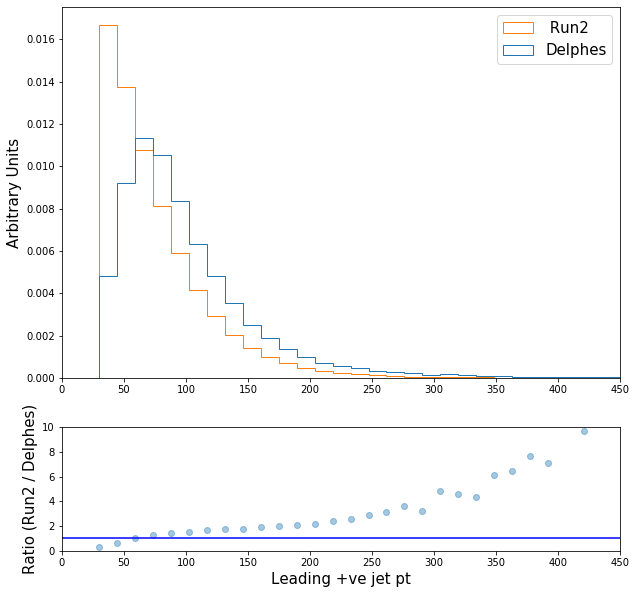

In [6]:
binning = np.linspace(30,450, 30)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

y = []
y.append(jet_pt)
y.append(tt_b_pt)

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns, bins, patches = ax1.hist(y, density=True,
                      histtype='step',
                      bins=binning,
                      label=['Delphes',' Run2 ']
                      )
ax1.legend(prop={'size': 15}, loc='upper right')
ax1.set_xlim(0, 450)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns[0] / ns[1],     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Leading +ve jet pt', fontsize=15)
ax2.set_ylim(0,10)
ax2.set_xlim(0,450)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [18]:
ajet_phi = ajet_phi[:len(jet_phi)]

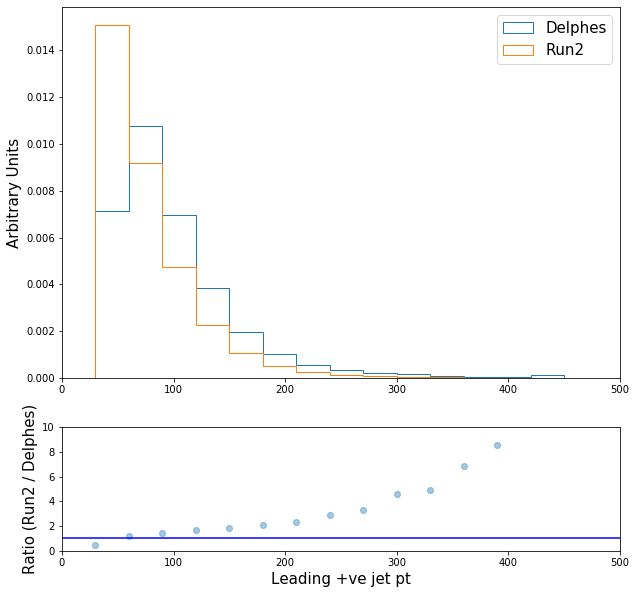

In [30]:
bins = np.linspace(30,450, 15)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(np.clip(jet_pt,  bins[0], bins[-1]),  density=True, histtype='step', bins=bins , label='Delphes')
ns2, bins2, patches  = ax1.hist(np.clip(tt_b_pt, bins[0], bins[-1]), density=True , histtype='step', bins=bins , label='Run2')

ax1.legend(prop={'size': 15}, loc='upper right')
ax1.set_xlim(0, 500)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Leading +ve jet pt', fontsize=15)
ax2.set_ylim(0,10)
ax2.set_xlim(0,500)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [31]:
rw = ns2/ns1
rw

for l,r in zip(range(14), range(1,15)):
    print(l,r)
    print(bins[l], bins[r])
    print(rw[l])

0 1
30.0 60.0
2.116609130582119
1 2
60.0 90.0
0.8516870677360425
2 3
90.0 120.0
0.6765312761906137
3 4
120.0 150.0
0.5877179629041734
4 5
150.0 180.0
0.5466073743835784
5 6
180.0 210.0
0.4835036124105492
6 7
210.0 240.0
0.432281854422787
7 8
240.0 270.0
0.3460861643503665
8 9
270.0 300.0
0.3021810384042812
9 10
300.0 330.0
0.21566896728751175
10 11
330.0 360.0
0.20279761477947325
11 12
360.0 390.0
0.1462351693305592
12 13
390.0 420.0
0.11648169331957962
13 14
420.0 450.0
0.0594616154980736


In [32]:
ew = []
for pt in jet_pt :
    for l,r in zip(range(14), range(1,15)):
        if ((bins[l] <= pt) and (pt <= bins[r])) :
            ew.append(rw[l])
    if (pt >= 450) :
        ew.append(rw[13])

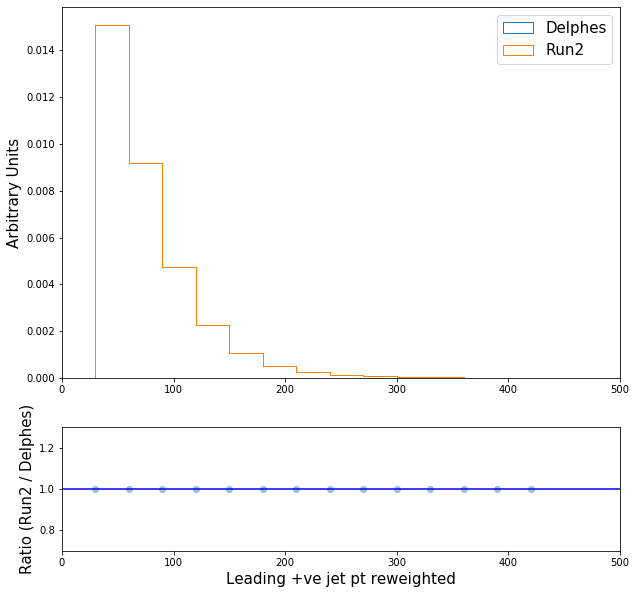

In [34]:
fig_style = {
    'figsize': (5, 5),
}

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(np.clip(jet_pt,  bins[0], bins[-1]),  density=True, histtype='step', bins=bins , label='Delphes', weights=ew)
ns2, bins2, patches  = ax1.hist(np.clip(tt_b_pt, bins[0], bins[-1]), density=True , histtype='step', bins=bins , label='Run2')

ax1.legend(prop={'size': 15}, loc='upper right')
ax1.set_xlim(0, 500)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns1 / ns2,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Leading +ve jet pt reweighted', fontsize=15)
ax2.set_ylim(0.7, 1.3)
ax2.set_xlim(0,500)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [12]:
jet_phi  =  np.array(jet_phi)
ajet_phi =  np.array(ajet_phi)

jet_dphi = (abs(abs(abs(jet_phi - ajet_phi) - np.pi) - np.pi))

In [36]:
jet_eta  =  np.array(jet_eta)
ajet_eta =  np.array(ajet_eta)

jet_deta = abs(jet_eta - ajet_eta)

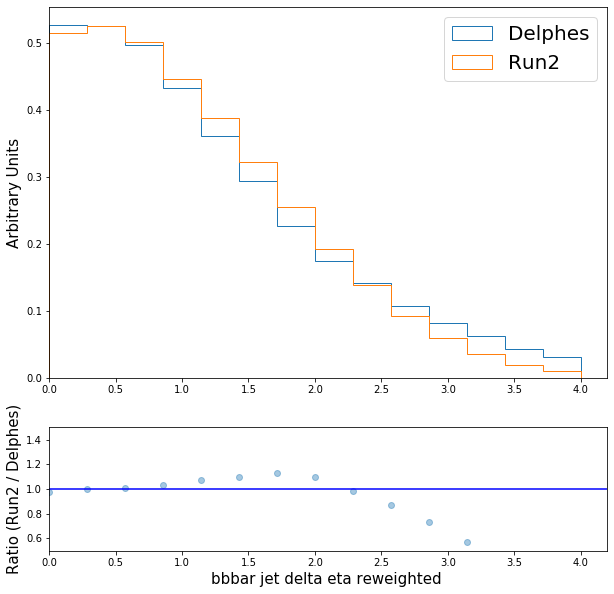

In [42]:
phi_bins = np.linspace(0, 4, 15)

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(jet_deta,      density=True, histtype='step', bins=phi_bins , label='Delphes', weights=ew)
ns2, bins2, patches  = ax1.hist(tt_bbbar_deta, density=True, histtype='step', bins=phi_bins , label='Run2')

ax1.legend(prop={'size': 20}, loc='upper right')
ax1.set_xlim(0, 4.2)
ax2.scatter(phi_bins[:-1],     # this is what makes it comparable
        ns2 / ns1,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('bbbar jet delta eta reweighted ', fontsize=15)
ax2.set_ylim(0.5,1.5)
ax2.set_xlim(0,4.2)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

Text(0, 0.5, 'Arbitrary Units')

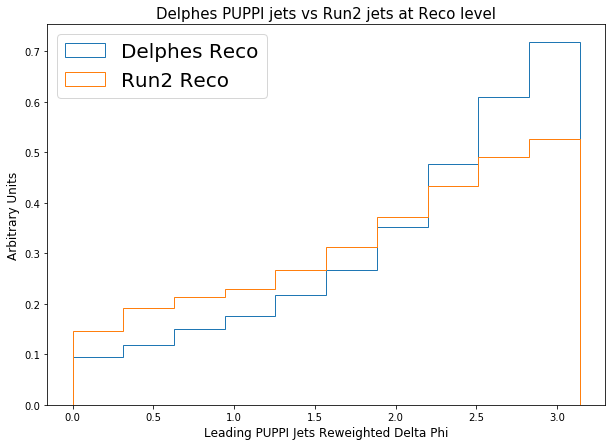

In [15]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', density=True)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', density=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Reweighted Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

Text(0, 0.5, 'Arbitrary Units')

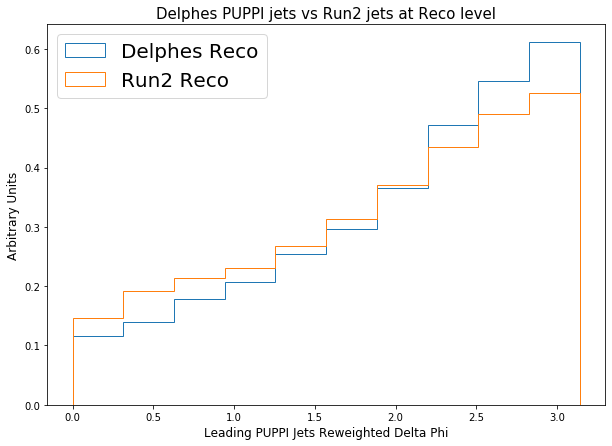

In [16]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', density=True, weights=ew)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', density=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Reweighted Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)

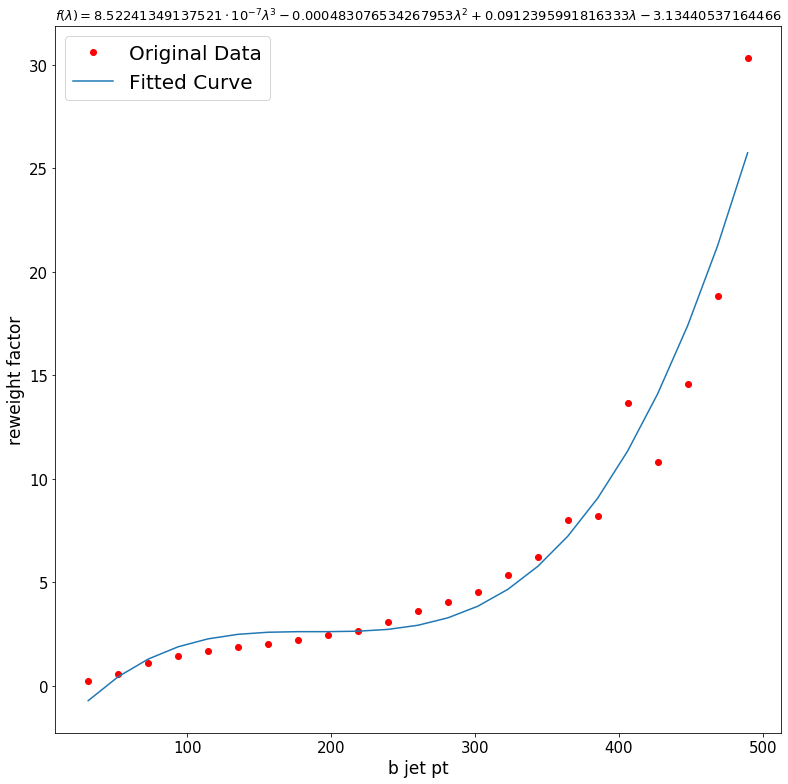

In [16]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import sympy as sym


#from matplotlib.pyplot import figure, axes
#figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
fig_style = {
    'figsize': (13, 13),
}

fig, ax = plt.subplots(**fig_style)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_xlabel('b jet pt', fontsize =17)
ax.set_ylabel('reweight factor', fontsize =17)

"""
Generate some data, let's imagine that you already have this. 
"""
#x = np.linspace(0, 3, 50)
#y = np.exp(x)
x = bin_centers[1:]
y = rw

"""
Plot your data
"""
plt.plot(x, y, 'ro',label="Original Data")

"""
brutal force to avoid errors
"""    
x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work

"""
create a function to fit with your data. a, b, c and d are the coefficients
that curve_fit will calculate for you. 
In this part you need to guess and/or use mathematical knowledge to find
a function that resembles your data
"""
def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d
"""
make the curve_fit
"""
popt, pcov = curve_fit(func, x, y)

"""
The result is:
popt[0] = a , popt[1] = b, popt[2] = c and popt[3] = d of the function,
so f(x) = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3].
"""
#print("a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3]))

"""
Use sympy to generate the latex sintax of the function
"""
xs = sym.Symbol('\lambda')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=13)

"""
Print the coefficients and plot the funcion.
"""

plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left', prop={'size': 20})
plt.savefig('Reweighting.png')
plt.show()

In [17]:
popt

array([ 8.52241349e-07, -4.83076534e-04,  9.12395992e-02, -3.13440537e+00])

In [18]:
def reweight(x):
    return popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3]

In [19]:
jet_pt_rw = reweight(np.array(jet_pt))

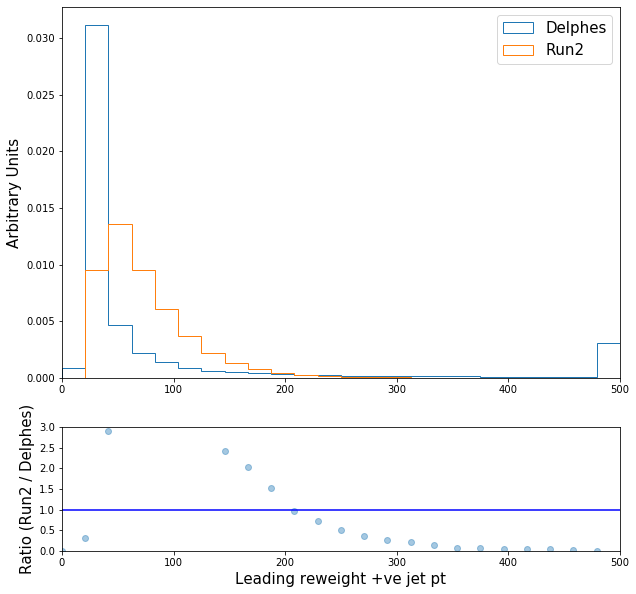

In [23]:
bins = np.linspace(0,500, 25)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}

jet_pt =  (1/jet_pt_rw) * jet_pt 

fig, (ax1, ax2) = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(np.clip(jet_pt,  bins[0], bins[-1]),  density=True, histtype='step', bins=bins , label='Delphes')
ns2, bins2, patches  = ax1.hist(np.clip(tt_b_pt, bins[0], bins[-1]), density=True , histtype='step', bins=bins , label='Run2')

ax1.legend(prop={'size': 15}, loc='upper right')
ax1.set_xlim(0, 500)
ax2.scatter(bins[:-1],     # this is what makes it comparable
        ns2 / ns1,     # maybe check for div-by-zero!
        alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax2.set_ylabel('Ratio (Run2 / Delphes)', fontsize=15)
ax2.set_xlabel('Leading reweight +ve jet pt', fontsize=15)
ax2.set_ylim(0,3)
ax2.set_xlim(0,500)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [27]:
jet_dphi = []
for i in range(len(jet_PUPPI_phi)) :
    if (len(jet_PUPPI_phi[i]) > 1) :
        if (jet_PUPPI_pt[i][1] > 30) :
            
            jet4vec  = ROOT.TLorentzVector()
            jet4vec.SetPtEtaPhiM(jet_PUPPI_pt[i][0], jet_PUPPI_eta[i][0], jet_PUPPI_phi[i][0], jet_PUPPI_mass[i][0])

            ajet4vec = ROOT.TLorentzVector()
            ajet4vec.SetPtEtaPhiM(jet_PUPPI_pt[i][1], jet_PUPPI_eta[i][1], jet_PUPPI_phi[i][1], jet_PUPPI_mass[i][1])
        
            jet_dphi.append(abs(jet4vec.DeltaPhi(ajet4vec)))

In [47]:
jet_phi  =  np.array(jet_phi)
ajet_phi =  np.array(ajet_phi)

In [27]:
jet_dphi = []
for i in range(len(jet_PUPPI_phi)) :
    if (len(jet_PUPPI_phi[i]) > 1) :
        if (jet_PUPPI_pt[i][1] > 30) and (abs(jet_PUPPI_eta[i][0]) < 2.5) and (abs(jet_PUPPI_eta[i][1]) < 2.5) :
            
            jet4vec    = ROOT.TLorentzVector()
            jet_rw_pt  = reweight(jet_PUPPI_pt[i][0])
            jet4vec.SetPtEtaPhiM(jet_rw_pt, jet_PUPPI_eta[i][0], jet_PUPPI_phi[i][0], jet_PUPPI_mass[i][0])

            ajet4vec   = ROOT.TLorentzVector()
            ajet_rw_pt = reweight(jet_PUPPI_pt[i][1])
            ajet4vec.SetPtEtaPhiM(ajet_rw_pt, jet_PUPPI_eta[i][1], jet_PUPPI_phi[i][1], jet_PUPPI_mass[i][1])
        
            jet_dphi.append(abs(jet4vec.DeltaPhi(ajet4vec)))

Text(0, 0.5, 'Arbitrary Units')

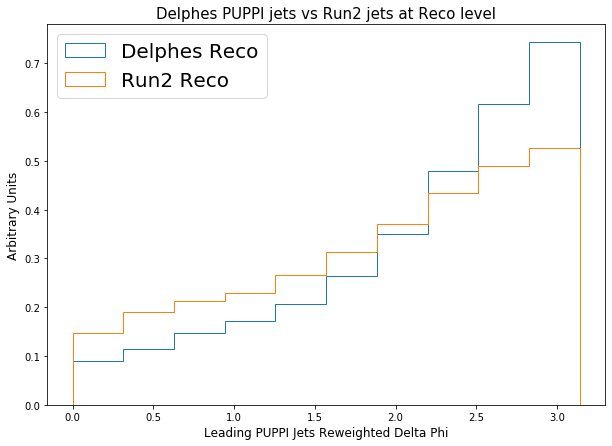

In [28]:
fig_style = {
    'figsize': (10, 7),
}

fig, ax = plt.subplots(**fig_style)

plt.title('Delphes PUPPI jets vs Run2 jets at Reco level', fontsize=15)
plt.hist(jet_dphi, histtype='step', label = 'Delphes Reco', density=True)
plt.hist(tt_bbbar_dphi, histtype='step' , label = 'Run2 Reco', density=True)

ax.legend(prop={'size': 20}, loc='upper left')
plt.xlabel('Leading PUPPI Jets Reweighted Delta Phi', fontsize=12)
plt.ylabel('Arbitrary Units', fontsize=12)